In [1]:
import polars as pl
import seaborn as sns

In [2]:
df = pl.read_csv("scores.csv")
df.head()

Algorithm,Length,Trial,Score
str,i64,i64,f64
"""bubble""",1,1,0.0
"""bubble""",1,2,0.0
"""bubble""",1,3,0.0
"""bubble""",1,4,0.0
"""bubble""",1,5,0.0


In [24]:
# Calculate mean and confidence intervals
df_summary = df.group_by(
    pl.col("Algorithm"),
    pl.col("Length")
).agg(
    pl.col("Score").mean().alias("mean"),
    pl.col("Score").std().alias("std"),
)
df_summary.head()

Algorithm,Length,mean,std
str,i64,f64,f64
"""bubble""",472,4.6155e7,1.4246e6
"""min""",464,149215.1,1619.348924
"""min""",104,6912.45,140.21355
"""selection""",46,2578.35,51.098743
"""quick""",233,397098.05,59305.642133


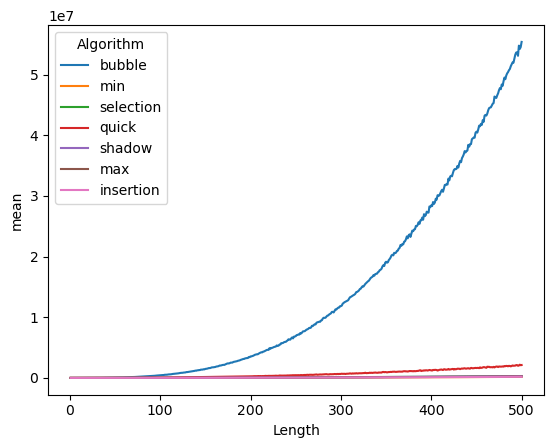

In [25]:
df_summary = sns.lineplot(
    df_summary,
    x="Length",
    y="mean",
    hue="Algorithm",
)